In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [3]:
patents = pd.read_csv('data/merged.csv')
patents

In [93]:
# Clean data
patents['IPC'] = patents['IPC'].str.replace(':', '/')
# Drop rows with no IPC
patents = patents.drop(patents[patents["IPC"].isna()].index)
# Add a column for the section
patents['Section'] = patents['IPC'].str[0]
# Drop the section I - unknown
patents = patents.drop(patents[patents['Section'] == 'I'].index)
# Add a column for the class
patents['Class'] = patents['IPC'].str[:3]
# Add a column for the subclass
patents['Subclass'] = patents['IPC'].str[:4]
# Add column for groups
patents["Group"] = patents['Subclass'] + "-" + patents['IPC'].str.split("/").str[0].str.split("-").str[1].fillna('0').str.zfill(3)

In [5]:
patents = pd.read_csv('years/2000.csv')

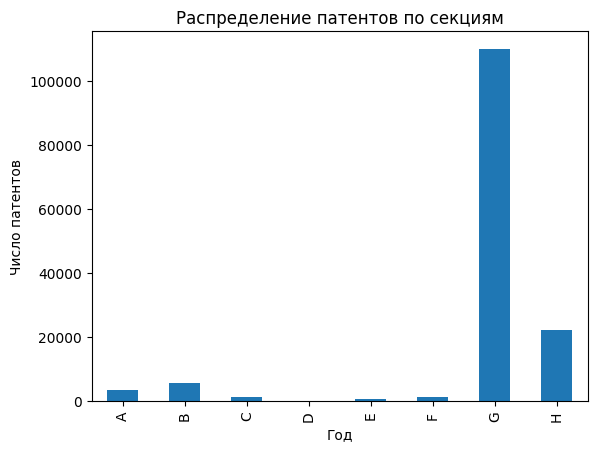

In [6]:
section_distr = patents["Section"].value_counts()
section_distr.sort_index().plot(kind='bar')
plt.xlabel('Год')
plt.ylabel('Число патентов')
plt.title('Распределение патентов по секциям')
plt.show()


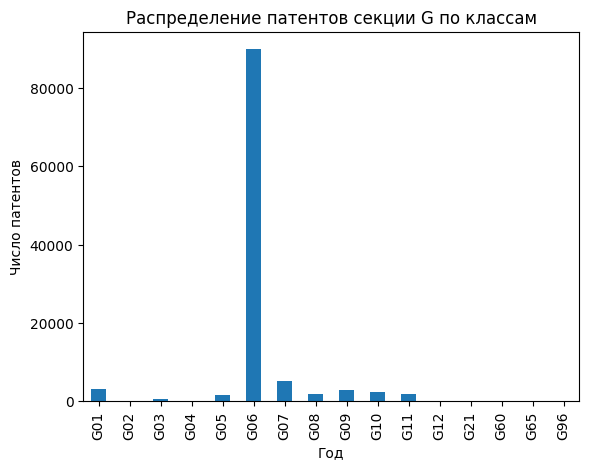

In [7]:
class_distr = patents[patents['Section'] == "G"]["Class"].value_counts()
class_distr.sort_index().plot(kind='bar')
plt.xlabel('Год')
plt.ylabel('Число патентов')
plt.title('Распределение патентов секции G по классам')
plt.show()

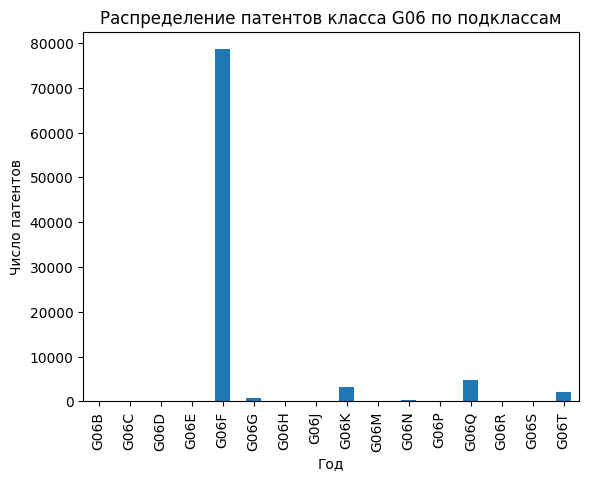

In [8]:
subclass_distr = patents[patents['Class'] == "G06"]["Subclass"].value_counts()
subclass_distr.sort_index().plot(kind='bar')
plt.xlabel('Год')
plt.ylabel('Число патентов')
plt.title('Распределение патентов класса G06 по подклассам')
plt.show()

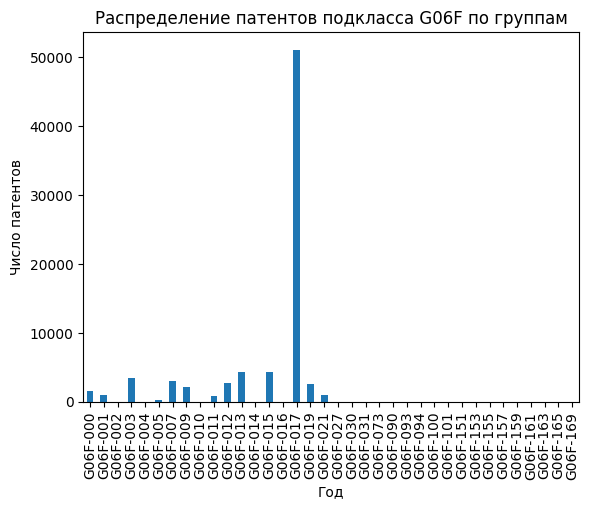

In [9]:
group_distr = patents[patents['Subclass'] == "G06F"]["Group"].value_counts()
group_distr.sort_index().plot(kind='bar')
plt.xlabel('Год')
plt.ylabel('Число патентов')
plt.title('Распределение патентов подкласса G06F по группам')
plt.show()

In [10]:
group_distr

Group
G06F-017    51087
G06F-013     4364
G06F-015     4348
G06F-003     3421
G06F-007     3084
G06F-012     2711
G06F-019     2615
G06F-009     2113
G06F-000     1541
G06F-021      974
G06F-001      950
G06F-011      779
G06F-005      313
G06F-157       42
G06F-159       40
G06F-153       38
G06F-101       31
G06F-151       23
G06F-161       23
G06F-155       23
G06F-165       19
G06F-094       14
G06F-093        6
G06F-169        6
G06F-030        5
G06F-163        5
G06F-016        4
G06F-014        4
G06F-004        2
G06F-031        2
G06F-100        2
G06F-002        1
G06F-073        1
G06F-027        1
G06F-010        1
G06F-090        1
Name: count, dtype: int64

In [11]:
subclass_distr

Subclass
G06F    78594
G06Q     4749
G06K     3261
G06T     2081
G06G      701
G06N      349
G06E       64
G06J       21
G06M       18
G06C       15
G06H        8
G06D        4
G06R        3
G06P        2
G06B        1
G06S        1
Name: count, dtype: int64

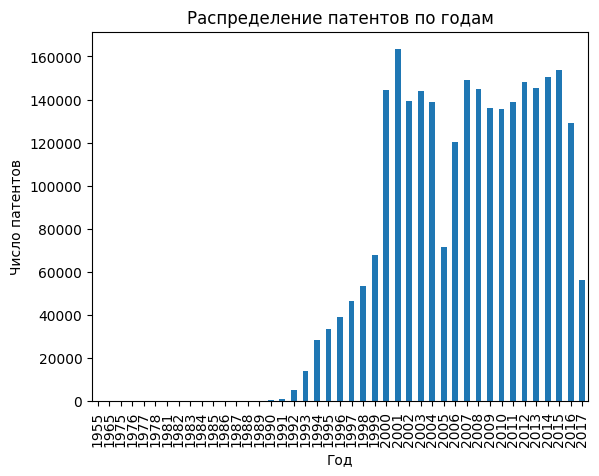

In [113]:
patents['Year'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Год')
plt.ylabel('Число патентов')
plt.title('Распределение патентов по годам')
plt.show()


In [114]:
patents

,Text,Year,IPC,Section,Class,Subclass,Group
0,Automatic system for teaching and monitoring l...,1992,G09B-007/06,G,G09,G09B,G09B-007
1,Automatic system for teaching and monitoring l...,1992,G09B-005/06,G,G09,G09B,G09B-005
2,Automatic system for teaching and monitoring l...,1992,G09B-005/02,G,G09,G09B,G09B-005
3,Automatic system for teaching and monitoring l...,1992,G09B-005/12,G,G09,G09B,G09B-005
4,Automatic system for teaching and monitoring l...,1992,G06F-000/00,G,G06,G06F,G06F-000
...,...,...,...,...,...,...,...
2727799,System for generating examination of spelling ...,2016,G06F-017/21,G,G06,G06F,G06F-017
2727800,System for generating examination of spelling ...,2016,G06K-019/06,G,G06,G06K,G06K-019
2727801,System for generating examination of spelling ...,2016,G06F-017/30,G,G06,G06F,G06F-017
2727802,System for providing advertisement keyword in ...,2016,G06Q-030/02,G,G06,G06Q,G06Q-030


In [123]:
years = patents['Year'].unique()
years.sort()

# Create the 'years' directory if it doesn't exist
if not os.path.exists('years'):
    os.makedirs('years')

# Save the file
for year in tqdm(years):
    year_records = patents[patents['Year'] == year]
    year_records = year_records.drop('Year', axis=1)
    year_records = year_records.drop('IPC', axis=1)
    year_records.to_csv(f'years/{year}.csv', index=False)

  0%|          | 0/43 [00:00<?, ?it/s]